In [8]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Programmieraufgabe

In [53]:
def interpoly(x, f):
    polynomial = np.poly1d(0)

    for i in range(len(x)):
        base_node = 1
        for j in range(len(x)):
            if i != j:
                base_node *= np.poly1d([1, -x[j]])/ (x[i]-x[j])
        polynomial += base_node * f[i]
    
    points = np.linspace(np.min(x), np.max(x), 100)
    points_f = [polynomial(point) for point in points]
    
    return points, points_f


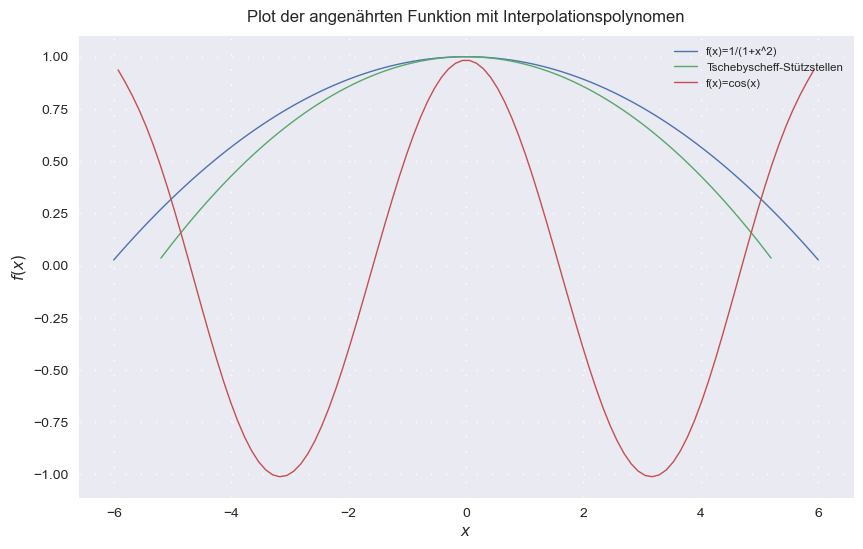

In [106]:
plt.style.use('seaborn')
fig = plt.figure(figsize=(10,6))

# f(x)= 1/(1+x^2)

f = lambda x: 1/(1+x**2)
x1 = np.linspace(-6, 6, 3)
y1 = np.array([f(point) for point in x1])

x1_int, y1_int = interpoly(x1, y1)

# Funktion für Berechnung der Tschebyscheff-Stützstellen
t_nodes = lambda a, b, n, j: (a+b)/2 + (b-a)/2 * np.cos(((2*j - 1) / (2*(n+1))) * np.pi)
n = 2
x_T = np.array([t_nodes(-6, 6, n, j) for j in range(1, n+2)])
y_T = np.array([f(point) for point in x_T])

x2,y2 = interpoly(x_T, y_T)

# cos(x)

f = lambda x: np.cos(x)

x = np.linspace(-6, 6, 9)
y = np.array([f(point) for point in x])

interpoly(x, y)
n = 9
x_T = np.array([t_nodes(-6, 6, n, j) for j in range(1, n+2)])
y_T = np.array([f(point) for point in x_T])

x3,y3 = interpoly(x_T, y_T)

#Plot der Funktionen
plt.plot(x1_int, y1_int,linewidth=1, label='f(x)=1/(1+x^2)')
plt.plot(x2, y2,linewidth=1, label='Tschebyscheff-Stützstellen')
plt.plot(x3, y3,linewidth=1, label='f(x)=cos(x)')

#Einstellungen für die Darstellung
plt.title('Plot der angenährten Funktion mit Interpolationspolynomen', pad ='10')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.grid(linestyle=(0, (1, 10)))
plt.legend(loc = 'upper right', fontsize = 'small')


### 2. Programmieraufgabe

In [89]:
#define complex random numbers
np.random.seed(42)
def complex_rand():
    return np.random.rand(1) + 1j * np.random.rand(1)   

In [90]:
def polyzeros(a):
    tol = 10e-15
    #Grad des Polynoms
    n = len(a) - 1
    
    #Erzeugen des Polynoms 
    p = np.poly1d(a)
    
    #create a lambda function for p 
    p_lambda = lambda x: p(x)
    
    #Polynom ableiten und ausgeben / np.polyder() gibt nur Koeffizienten zurück
    p_ableitung = np.poly1d(np.polyder(a))
    
    #create a lambda function for p_ableitung
    p_lambda_ableitung = lambda x: p_ableitung(x)
    
    # Initialiesierung
    w = np.zeros(n, dtype = 'complex_') # Faktor für Subtraktion
    z = np.zeros(n, dtype = 'complex_') # NST
    sub_terme = np.zeros(n, dtype = 'complex_')
    abbruch = True
    
    for i in range(n):
        x = np.array(complex_rand(), dtype = 'complex_')
        k = 0
        while abbruch == True:
            for l in range(n):
                sub_terme[l] =  (-1)/(x[k]-z[l])
            x = np.append(x, x[k]-(1/(((p_ableitung(x[k]))/(p(x[k])))+(np.sum(w*sub_terme)))))
            k += 1
            if np.abs(x[k-1]-x[k])<tol:
                abbruch = False
        z[i] = x[-1]
        w[i] = 1
        abbruch = True
    return z

In [91]:
a = np.array([1,0,0,0,-1])


nst = polyzeros(a)
for i in range(len(nst)):
    print(i+1,"te Nullstelle:", np.round(nst[i], decimals=5), "\n")

1 te Nullstelle: (-0+1j) 

2 te Nullstelle: (1+0j) 

3 te Nullstelle: -1j 

4 te Nullstelle: (-1-0j) 



### 3. Programmieraufgabe

In [92]:
def ableitungsplot(f,a,b,n,h):
    # Wertepaare ausrechnen
    x = np.linspace(a,b,n)
    y = np.zeros(n, dtype=np.double) # Funktion
    y1 = np.zeros(n, dtype=np.double) # erste Ableitung
    y2 = np.zeros(n, dtype=np.double) # zweite Ableitung
    for i in range(n):
        y[i] = f(x[i])
        y1[i] = (f(x[i]+h)-f(x[i]-h))/(2*h)
        y2[i] = (f(x[i]-h)-2*f(x[i])+f(x[i]+h))/(h**2)
    
    # Plot der Funktionen
    plt.clf()
    plt.plot(x, y, color = 'black', linewidth=0.6, label="Funktion f(x)") 
    plt.plot(x, y1, color = 'blue', linewidth=0.6, label="Erste Ableitung f'(x)")
    plt.plot(x, y2, color = 'cyan', linewidth=0.6, label="Zweite Ableitung f''(x)")
    plt.legend(loc="upper right")
    plt.xlim(a,b)
    plt.xlabel("x") 
    plt.ylabel("y")
    plt.title("Plot der Funktion und den ersten beiden Ableitungen", pad ='15')
    plt.show() 

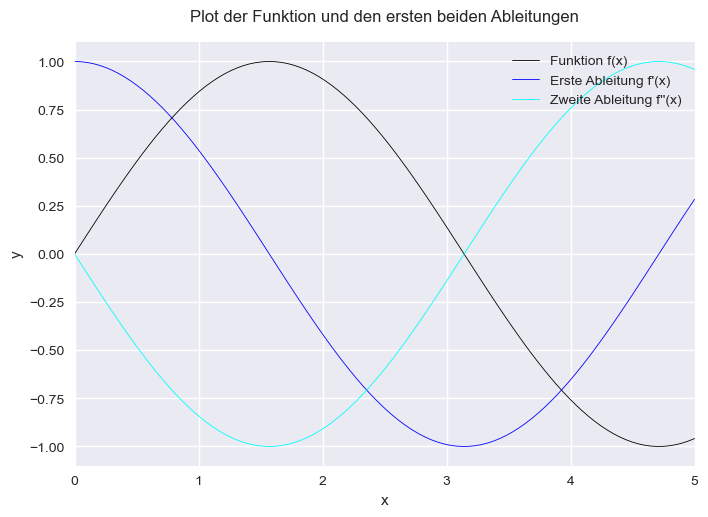

In [93]:
a = 0
b = 5
n = 100
h = 0.001
def f(x):
    f = np.sin(x)
    return f

ableitungsplot(f,a,b,n,h)

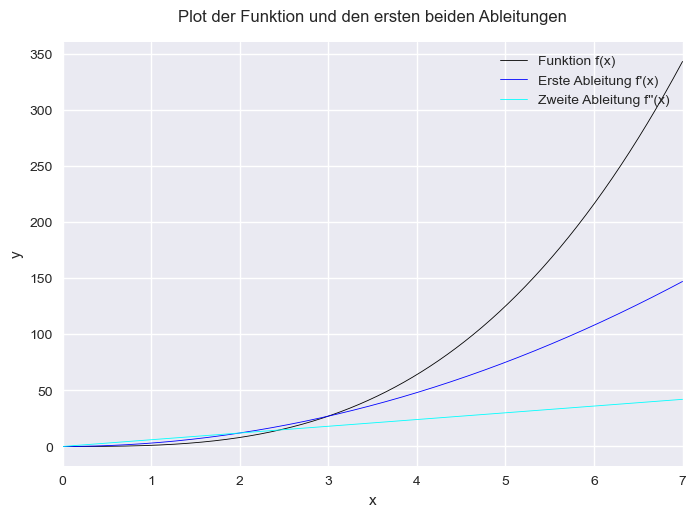

In [94]:
a = 0
b = 7
n = 1000
h = 0.001
def f(x):
    f = x**3
    return f

ableitungsplot(f,a,b,n,h)

### 4. Programmieraufgabe

In [95]:
def integral(f,a,b,n):
    t = np.zeros(1, dtype=np.double)
    s = np.zeros(1, dtype=np.double)
    h = (b-a)/(n-1)
    x = np.array([a],dtype=np.double)
    for i in range(n-1):
        x = np.append(x, a+(i+1)*h)
        #summierte Trapezregel
        t = np.append(t, h/2*(f(x[i])+f(x[i+1])))
        #summierte Simpsonregel
        s = np.append(s, h / 6 * (f(x[i]) + 4 * f((x[i]+x[i+1]) / 2) + f(x[i + 1])))
    T = np.sum(t)   
    S = np.sum(s)
    return T,S

def f(x):
    f = x**3
    return f

In [96]:
a = 0
b = 1
n = 100
[T,S] = integral(f,a,b,n)
print("Nach der summierten Trapezregel gilt: T=",T)
print("Nach der summierten Simpsonregel gilt: S=", S)

Nach der summierten Trapezregel gilt: T= 0.25002550760126524
Nach der summierten Simpsonregel gilt: S= 0.2500000000000001
